e:\3RD YEAR\6th Sem\PE 3 & 4\NLP\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
12:37:49 - cmdstanpy - INFO - Chain [1] start processing
12:37:49 - cmdstanpy - INFO - Chain [1] done processing


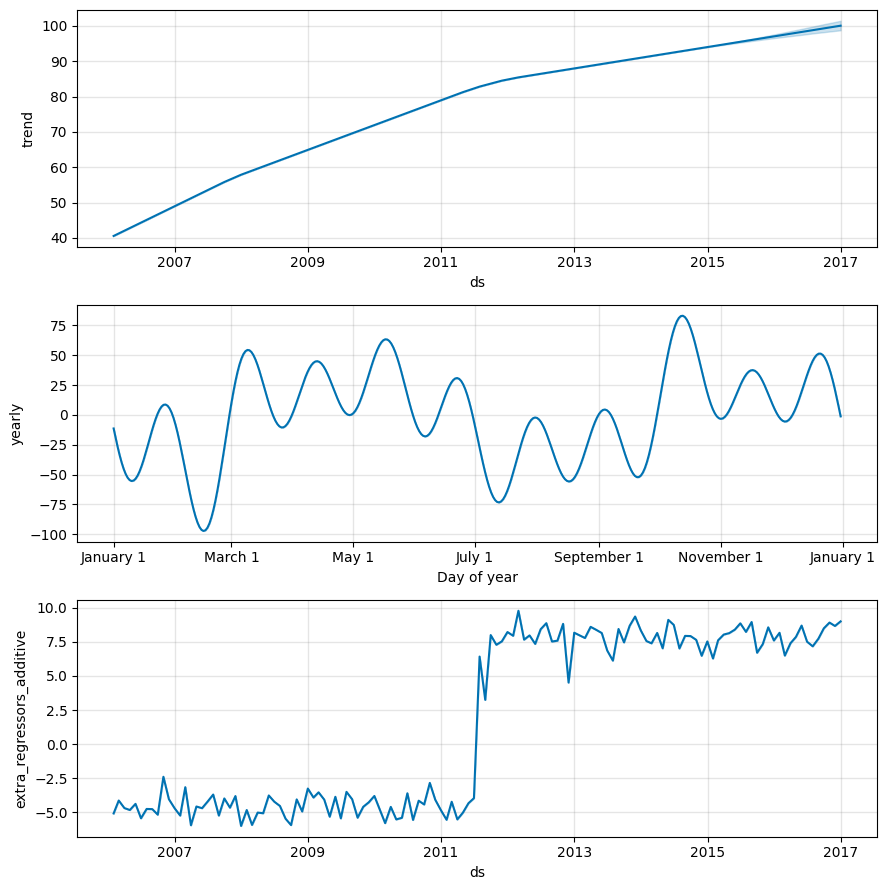

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# -------------------------------
# 1. Load dataset
# -------------------------------
df = pd.read_csv("ML471_S4_Datafile_Practice.csv")

# Fix date parsing (important)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# -------------------------------
# 2. Prepare data for Prophet
# -------------------------------
prophet_df = df[['Date', 'Close', 'Volume']].rename(
    columns={'Date': 'ds', 'Close': 'y'}
)

# -------------------------------
# 3. Train-test split
# -------------------------------
train_size = int(len(prophet_df) * 0.8)
train_df = prophet_df.iloc[:train_size]
test_df  = prophet_df.iloc[train_size:]

# -------------------------------
# 4. Define Prophet model
# -------------------------------
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

# Add trading volume as external regressor
model.add_regressor('Volume')

# -------------------------------
# 5. Fit model
# -------------------------------
model.fit(train_df)

# -------------------------------
# 6. Create future dataframe (FIXED freq)
# -------------------------------
future = model.make_future_dataframe(
    periods=len(test_df),
    freq='ME'   # Month End (new pandas standard)
)

# Add volume values (required)
future['Volume'] = prophet_df['Volume'].values

# -------------------------------
# 7. Forecast
# -------------------------------
forecast = model.predict(future)

# -------------------------------
# 8. Plot COMPONENTS
# -------------------------------
model.plot_components(forecast)
plt.show()
